## Final Project Submission

Please fill out:
* Student name: Nimeshi Fernando, Tyler Wood, Greg Burgess
* Student pace:full time
* Scheduled project review date/time: 3/11/22 7PM EST
* Instructor name: David Elliot
* Blog post URL:



 # From Xbox to Box Office: An intial industry analysis of the film industry for MS Studios 

 ![MoviesUrl](https://tenor.com/view/minions-shh-quiet-movie-movies-gif-11885588.gif "movies")

## Overview

This project investigates the movie industry as a potential next investment for Microsoft Studios. Descriptive analysis of the data illustrated procuring high budgets, high profile directors and popular genres as one potential approach to producing a sucessful film. Microsoft Studios can use this analysis to determine how best to utilize their vast resources prior to their Hollywood debut. 

## Business Problem


 ![MovieUrl](https://tenor.com/view/whoa-bob-the-minion-kevin-the-minion-stuart-the-minion-pierre-coffin-gif-16561921.gif "movie")

Microsoft is strategizing the best approach to take when entering the movie industry; they want recommendations supported by data analytics. This industry is notoriously competitive, and the most successful films proved to be outliers. Therefore the recommended strategy was to aim to be an outlier, in a way that only a company Like Microsoft can be.  Through the use of the 3rd party data given, we identified production budget, genres and directors as viable factors and strived to tailor our recommendations to ones that best fit Microsoft as a company.

## Data Understanding

The raw data used originated from three different sources and was ultimately processed and used in the analysis that led to our three recommendations. Our data sources were The Numbers database, IMDb.com and Box Office Mojo. 

Additionaly, we had the option of using data from two other sources: Rotten Tomatoes and The Movie Database. Eventually we chose not to use this data in our final analysis as either there was alot of repetition(tmdb) to our other data, or too many null values (rotten tomato) to be a viable data set. 


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# print big numbers in pd.DataFrame (instead of scientific notation)
pd.set_option('display.precision', 12)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set matplotlib title font size
plt.rcParams['axes.titlesize'] = 18

## The Numbers Data

From the numbers database we used the production budget, domestic gross and worldwide gross values. Each value corresponds to a movie title, release date and ID. The Box Office Mojo data also contained values that could be used for the financial part of our analysis. However we ultimately decided to use the numbers data because that data also included production budget values, while the others didn't. 


In [2]:
# create The Numbers data frame
tn_movie_budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
# show it contains movies, both big and small
tn_movie_budgets_df.iloc[[5, 500, 5000]]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
500,1,"Jun 8, 2007",Ocean's Thirteen,"$85,000,000","$117,144,465","$311,744,465"
5000,1,"Dec 1, 2015",Shark Lake,"$2,000,000",$0,$0


### Data Cleaning
We realized in the early stages of data exploration that until we correctly formatted the currency columns that we could not use those figures in our data processing. Therefore we made a helper function to perform the necessary transformations in the most efficient way. 

In [3]:
#Helper function to clean the money columns
def convert_money_string(money_series):
    '''
    This function takes a pd.Series wi+th string values representing money (USD) and converts that string to float
    '''
    return money_series.str.replace('$','').str.replace(',','').astype(float)

In [4]:
# Here we clean special characters out of the money strings, convert the strings into floats,
# and then create column of values in millions of dollars
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    tn_movie_budgets_df[col] = convert_money_string(tn_movie_budgets_df[col])
    col_mil = f"{col}_mil"
    tn_movie_budgets_df[col_mil] = tn_movie_budgets_df[col] / 1000000

### Feature Engineering

We used the transformed data to calculate the necessary processed data columns: total profit and return on investment (ROI)

In [5]:
# Here we calculated worldwide_profit in millions for each movie
tn_movie_budgets_df['worldwide_profit_mil'] = tn_movie_budgets_df['worldwide_gross_mil'] - tn_movie_budgets_df['production_budget_mil']
# Here we calculated return on investment for each movie
tn_movie_budgets_df['ROI'] = tn_movie_budgets_df['worldwide_profit_mil'] / tn_movie_budgets_df['production_budget_mil']

## Box Office Mojo Data

Data from Box Office Mojo was catergorized by movie title, studio and release date and also included figures for gross revenue. We utlimately decided to use this data because of the unique catergorisation by studio. This allowed us to provide an analysis into Microsoft Studios future competitors and supply recommendations that are congruent with the type of resources that Microsoft Studios will be backed by. 

In [6]:
# Here we read in the Box Office Mojo data frame
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
# once again to show variety of movies in the data frame
bom_df.iloc[[3,300,3000]]

,title,studio,domestic_gross,foreign_gross,year
3,Inception,WB,292600000.00,535700000,2010
300,Saint John of Las Vegas,IVP,103000.00,9100,2010
3000,My Life as a Zucchini,GK,310000.00,NaN,2017


In [7]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


### Data Cleaning

This dataset was cleaned in a two-step process. First we converted each currency column into a float and we replaced all the null values across the numeric columns with 0. These changes were again done to calculate the necessary numerical data.

In [8]:
# Call convert_money_string on foreign_gross to get floats
for col in ['foreign_gross']:
    bom_df[col] = convert_money_string(bom_df[col])
    col_mil = f"{col}_mil"
    bom_df[col_mil] = bom_df[col] / 1000000

In [9]:
# Here we are infering that missing values actually represent no money made in a given region
bom_df['foreign_gross'].fillna(0, inplace=True)
bom_df['domestic_gross'].fillna(0, inplace=True)
bom_df['foreign_gross_mil'].fillna(0, inplace=True)

### Feature Engineering

We wanted to examine the relationship between domestic and foreign gross so we created the worldwide gross column as well as converted the domestic gross into millions to make our final graphs more readable.


In [10]:
bom_df['domestic_gross_mil'] = bom_df['domestic_gross'] / 1000000
bom_df['bom_worldwide_gross_mil'] = bom_df['domestic_gross_mil'] + bom_df['foreign_gross_mil']

## Internet Movie Database (IMDb) SQL database

This data set contained copious amounts of information including tables containing movie names, movie rating, directors, actors etc. It was a journey to not only navigate through all the different tables but also navigating the relationships between these tables. That is why we have included the ERD.

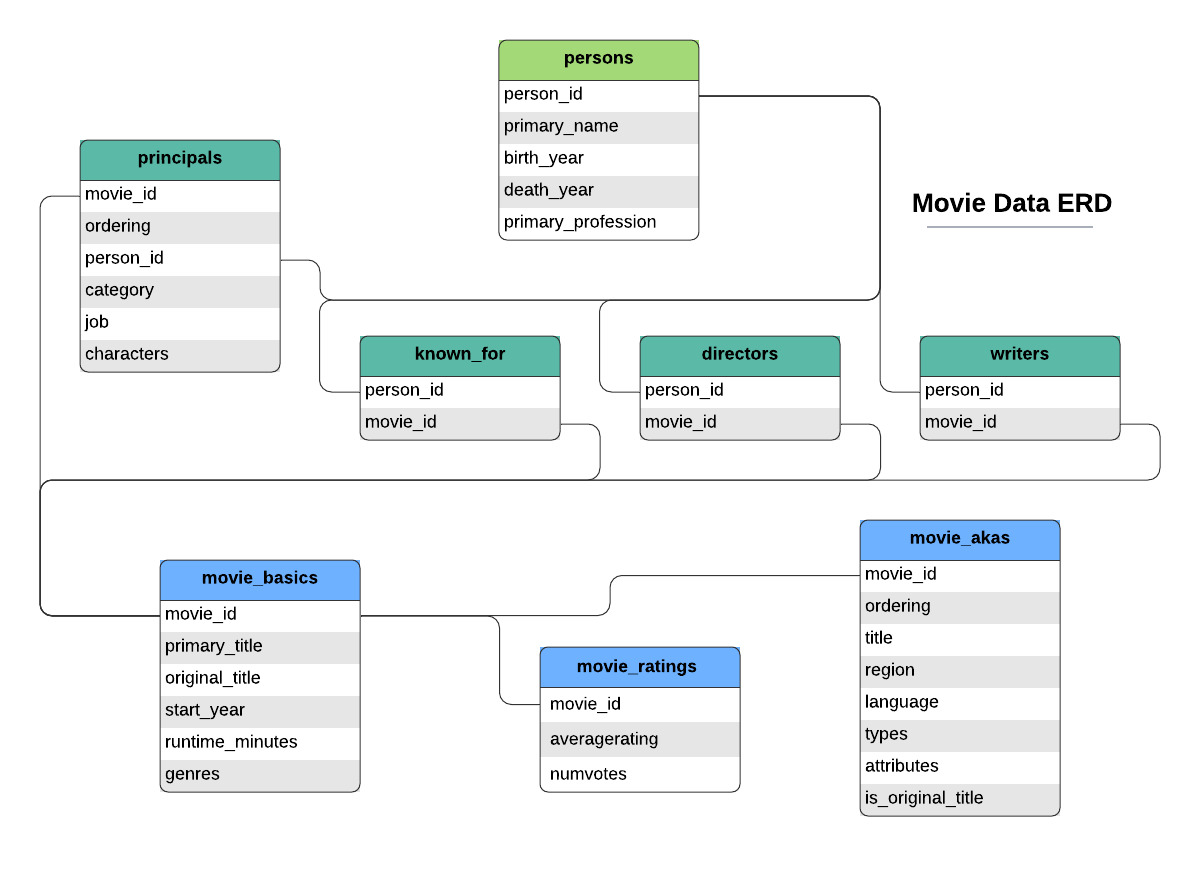



### Used SQL to get info about `movie_basics` and `movie_ratings`


In [11]:
# Create the connect to im.db database
con = sqlite3.connect('./zippedData/im.db')

#### movie_ratings table : contains`averagerating` and `numvotes` are columns of IMDb ratings

In [12]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    movie_ratings
LIMIT 5
""", con)

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


#### movie_basics table : contains `primary_title`,`genres` and `start_year`

In [13]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    movie_basics
LIMIT 5
""", con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


### Used SQL to filter infomation about   `persons` and `principals`

#### persons table : contains `primary_name`and `person_id`

In [14]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    persons
LIMIT 5
""", con)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


#### principals table: contains `category` ,`movie_id` and `person_id`

In [15]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    principals
LIMIT 5
""", con)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


## Data Preparation

We approached the data preparation by aggregating all the data across all the sources and seeing the insights we could gain from the data as a whole. 

#### Let's JOIN im.db `movie_basics`  and `movie_ratings`

We created an `imdb_ratings_df` DataFrame joining names, genres, and ratings for each movie

In [16]:
### Look into who the primary directors are
# Use LEFT JOIN to keep all movies, even if they are not in the movie_ratings table
imdb_ratings_df = pd.read_sql("""

SELECT
    b.movie_id, b.primary_title, b.original_title, b.start_year, b.runtime_minutes, b.genres,
    r.averagerating, r.numvotes
FROM
    movie_basics as b
    LEFT JOIN movie_ratings as r
        USING(movie_id)

""", con)

#### Let's JOIN im.db `persons`  and `principals`

When we created the `imdb_principals_df` DataFrame, we noticed that `movie_id` and `person_id` had a one-to-many mapping (i.e., one `person_id` can have multiple roles in each `movie_id`). Therefore, the resulting data frame was too bulky to use again.
   


In [17]:
# Used LEFT JOIN to keep all principals, even if they have no persons info
imdb_principals_df = pd.read_sql("""

SELECT
    *
FROM
    principals
    LEFT JOIN persons
        USING(person_id)

""", con)

We still wanted to merge `imdb_ratings_df` **into** `imdb_principals_df` to find movie information for each principal.

In [18]:
# Merge imdb_ratings_df into imdb_principals_df 
# Use left join in order to keep all principalse
imdb_principals_df = imdb_principals_df.merge(imdb_ratings_df, on='movie_id', how='left')

## Filtration of the merged dataset

To make recommendations on which movies Microsoft Studios should produce, we made three assumptions: 

1. Microsoft wants to compete with the top 10% of movie studios in terms of performance 
2. Microsoft is not interested in producing "art house" movies that were not popular or profitable
3. Microsoft wants to produce popular movies (with large following and high ratings)

In [19]:
# Find the total worldwide gross for each studio
bom_studio_gross = bom_df.groupby('studio')['bom_worldwide_gross_mil'].sum()

In [20]:
# Now, let's focus on top studios (above 90th percentile in gross sales)
gross_sales_90 = np.percentile(bom_studio_gross, 90)

# Test studios in bom_studio_gross df to get list of top studios
filt = bom_studio_gross > gross_sales_90
competing_studios = bom_studio_gross[filt].index

In [21]:
# Use that list of competing studios to filter 
filt = bom_df['studio'].isin(competing_studios)
bom_competing_studios_df = bom_df[filt]

### Let's get movie and budget info for movies made by the top grossing "competing" studios
- Merge bom_competing_studios_df with tn_movie_budgets_df

In [22]:
# We get multiple rows when we merge tn_movie_budgets_df
# So add 'year' to use as additional key
tn_movie_budgets_df['year'] = tn_movie_budgets_df['release_date'].str[-4:].astype(int)

In [23]:
# Merge to add budgets
competing_studio_budgets_df = bom_competing_studios_df.merge(tn_movie_budgets_df,
                                                             left_on=['title', 'year'],
                                                             right_on=['movie', 'year'],
                                                             how='inner',
                                                             suffixes=('_bom', '_tn')
                                                            )

In [24]:
# Another merge to add ratings
competing_studio_budgets_ratings_df = competing_studio_budgets_df.merge(imdb_ratings_df,
                                                                        left_on=['title', 'year'],
                                                                        right_on=['primary_title', 'start_year'],
                                                                        how='inner')

## Analysis

### How does production budget affect outcome?

#### Correlations with Production Budget

| Business Outcome | Relationship with Production Budget |
| ------------------ | -------------- |
| worldwide_profit_mil | strong positive correlation |
| ROI | no correlation |
| averagerating | weak positive correlation |
| numvotes | moderate positive correlation |

In [25]:
# What are correlations with production budget?
corr_budgets_ratings = competing_studio_budgets_ratings_df[['production_budget_mil', 'worldwide_profit_mil', 
                                                            'ROI', 'averagerating', 'numvotes']].corr()
corr_budgets_ratings.iloc[0]

production_budget_mil    1.00
worldwide_profit_mil     0.64
ROI                     -0.09
averagerating            0.18
numvotes                 0.49
Name: production_budget_mil, dtype: float64

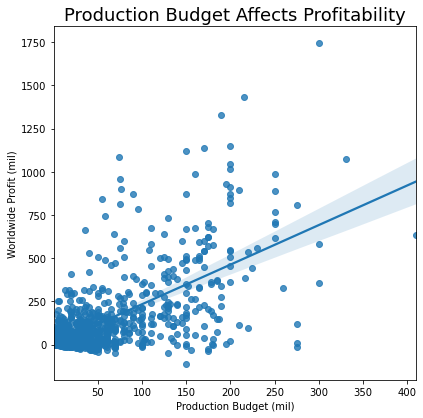

In [26]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='worldwide_profit_mil', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Profitability')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Worldwide Profit (mil)')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

As production budget increases profitability increases 

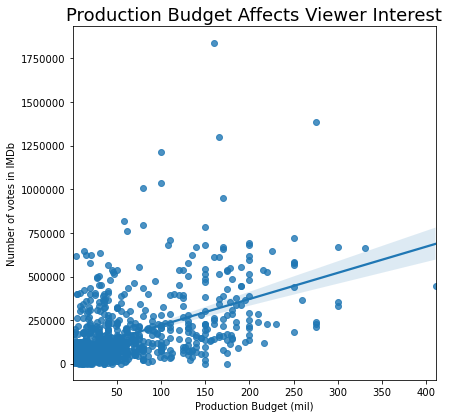

In [27]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='numvotes', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Viewer Interest')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Number of votes in IMDb')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

As production budget increases viewer count increases

In [28]:
# If we're going to give concrete advise about how much to budget for excellent movies, what would we say
# Again, let's suggest being an 'outlier'
perc90_budget = np.percentile(competing_studio_budgets_ratings_df['production_budget_mil'], 90)
print(f"Production budget of the 90th percentile: ${perc90_budget} million")

Production budget of the 90th percentile: $150.0 million


### How does movie genre affect outcomes?


In [29]:
set_of_genres = set()
for movie_row in competing_studio_budgets_ratings_df['genres'].dropna():
    set_of_genres.update(movie_row.split(','))

list_of_genres = list(set_of_genres)

Here we created a new data frame that contains rows for every genre. This allowed us to run `.groupby('genre')` to get summarizing statistics for each genre.

In [30]:
tmp_df_columns = list(competing_studio_budgets_ratings_df.columns)
tmp_df_columns.append('genre')
tmp_df = pd.DataFrame(columns=tmp_df_columns)


for genre in list_of_genres:
    filt = competing_studio_budgets_ratings_df['genres'].str.contains(genre, na=False)
    filt_df = competing_studio_budgets_ratings_df[filt]
    filt_df['genre'] = genre
    tmp_df = pd.concat([tmp_df, filt_df])
    
long_competing_studio_budgets_ratings_df = tmp_df

<ipython-input-30-72870965b343>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['genre'] = genre


In [31]:
# Now that we have each genre dataframe stacked on top of each other, we can use .groupby to get mean() for each genre
competing_studio_budgets_ratings_by_genre_df = long_competing_studio_budgets_ratings_df.groupby('genre')[['production_budget_mil', 'worldwide_profit_mil', 'ROI', 'averagerating', 'numvotes']].mean()

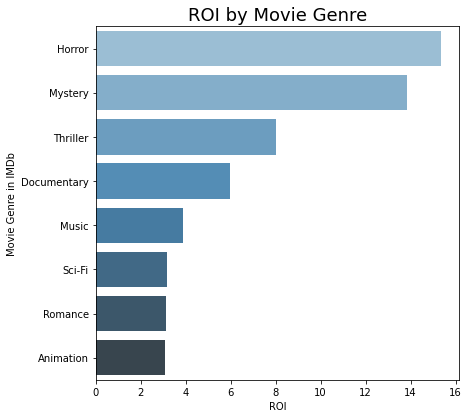

In [32]:
tmp = competing_studio_budgets_ratings_by_genre_df.sort_values('ROI', ascending=False)['ROI'].head(8)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('ROI by Movie Genre')
ax.set_xlabel('ROI')
ax.set_ylabel('Movie Genre in IMDb');

ROI is highest for Documentary, Horror, Mystery, and Thriller.

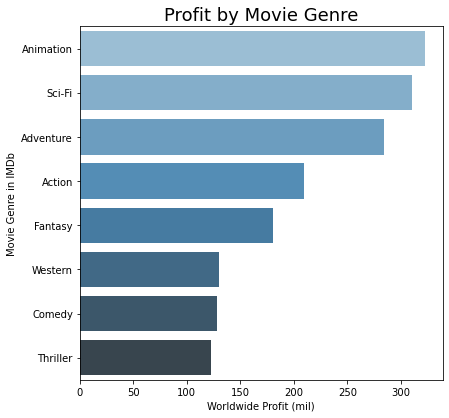

In [33]:
tmp = competing_studio_budgets_ratings_by_genre_df.sort_values('worldwide_profit_mil', ascending=False)['worldwide_profit_mil'].head(8)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Profit by Movie Genre')
ax.set_xlabel('Worldwide Profit (mil)')
ax.set_ylabel('Movie Genre in IMDb');

Average worldwide profit is highest for Animation, Sci-Fi, Adventure, Action

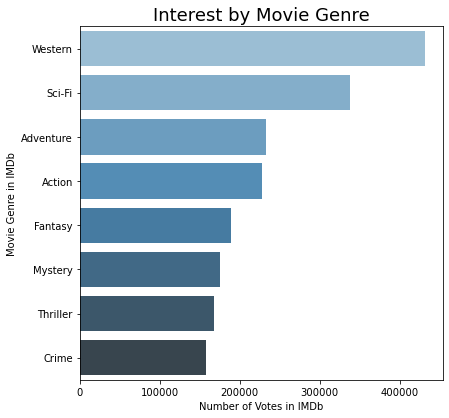

In [34]:
tmp = competing_studio_budgets_ratings_by_genre_df.sort_values('numvotes', ascending=False)['numvotes'].head(8)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Interest by Movie Genre')
ax.set_xlabel('Number of Votes in IMDb')
ax.set_ylabel('Movie Genre in IMDb');

Interest, depicted by the `numvotes` metric, is highest for Western, Sci-Fi, Adventure, Action

### How do movie directors affect outcomes?


We wanted to produce a list of the top directors based on profit, ROI and popularity (`numvotes`). We did this by creating a python set and then adding directors from each business outcome to the set.

In [35]:
# Let's make an empty set to save the best directors (we'll cast to list later)
director_set = set()

In [36]:
# created top 50 directors measured by worldwide profit
top_50_worldwide_profit_df = competing_studio_budgets_ratings_df.sort_values('worldwide_profit_mil', ascending=False).head(50)
# created top 50 directors measured by return on investment
top_50_ROI_df = competing_studio_budgets_ratings_df.sort_values('ROI', ascending=False).head(50)
# created top 50 directors measured by number of IMDb votes
top_50_votes_df = competing_studio_budgets_ratings_df.sort_values('numvotes', ascending=False).head(50)

In [37]:
principals_top_50_worldwide_profit_df = imdb_principals_df.merge(top_50_worldwide_profit_df, on='movie_id', how='inner')

In [38]:
filt = (principals_top_50_worldwide_profit_df['category'] == 'director')
sorted_df = principals_top_50_worldwide_profit_df[filt].sort_values('worldwide_profit_mil', ascending=False)
director_set.update(sorted_df.head(10)['primary_name'])
sorted_df.head(10)[['primary_name', 'primary_title_x', 'worldwide_profit_mil']]

,primary_name,primary_title_x,worldwide_profit_mil
436,Joe Russo,Avengers: Infinity War,1748.13
435,Anthony Russo,Avengers: Infinity War,1748.13
35,Colin Trevorrow,Jurassic World,1433.85
455,James Wan,Furious 7,1328.72
85,Ryan Coogler,Black Panther,1148.26
465,J.A. Bayona,Jurassic World: Fallen Kingdom,1135.77
175,Chris Buck,Frozen,1122.47
176,Jennifer Lee,Frozen,1122.47
245,Kyle Balda,Minions,1086.34
375,Joss Whedon,Avengers: Age of Ultron,1072.41


In [39]:
principals_top_50_ROI_df = imdb_principals_df.merge(top_50_ROI_df, on='movie_id', how='inner')
filt = principals_top_50_ROI_df['category'] == 'director'
sorted_df = principals_top_50_ROI_df[filt].sort_values('ROI', ascending=False)
director_set.update(sorted_df.head(10)['primary_name'])
sorted_df.head(10)[['primary_name', 'primary_title_x', 'ROI']]

,primary_name,primary_title_x,ROI
234,Chris Lofing,The Gallows,415.56
233,Travis Cluff,The Gallows,415.56
5,William Brent Bell,The Devil Inside,100.76
203,Tod Williams,Paranormal Activity 2,58.17
413,Jordan Peele,Get Out,50.07
114,Bradley Parker,Chernobyl Diaries,41.41
36,Ariel Schulman,Paranormal Activity 3,40.41
35,Henry Joost,Paranormal Activity 3,40.41
283,John R. Leonetti,Annabelle,38.52
253,Daniel Stamm,The Last Exorcism,37.98


In [40]:
principals_top_50_votes_df = imdb_principals_df.merge(top_50_votes_df, on='movie_id', how='inner')
filt = principals_top_50_votes_df['category'] == 'director'
sorted_df = principals_top_50_votes_df[filt].sort_values('numvotes_y', ascending=False)
director_set.update(sorted_df.head(10)['primary_name'])
sorted_df.head(10)[['primary_name', 'primary_title_x', 'numvotes_y']]

,primary_name,primary_title_x,numvotes_y
315,Christopher Nolan,Inception,1841066.00
345,Christopher Nolan,The Dark Knight Rises,1387769.00
415,Christopher Nolan,Interstellar,1299334.00
185,Quentin Tarantino,Django Unchained,1211405.00
235,Martin Scorsese,The Wolf of Wall Street,1035358.00
155,Martin Scorsese,Shutter Island,1005960.00
15,James Gunn,Guardians of the Galaxy,948394.00
205,Tim Miller,Deadpool,820847.00
325,Gary Ross,The Hunger Games,795227.00
165,George Miller,Mad Max: Fury Road,780910.00


In [41]:
director_list = list(director_set)

In [42]:
filt = imdb_principals_df['category'] == 'director'
directors_movies_df = imdb_principals_df[filt].merge(competing_studio_budgets_ratings_df, on='movie_id', how='inner')
filt = directors_movies_df['primary_name'].isin(director_list)
best_directors = directors_movies_df[filt]

In [43]:
# Make mean outcomes grouped by director name
grouped_best_directors = best_directors.groupby('primary_name')[['worldwide_profit_mil', 'ROI', 'averagerating_y', 'numvotes_y']].mean()

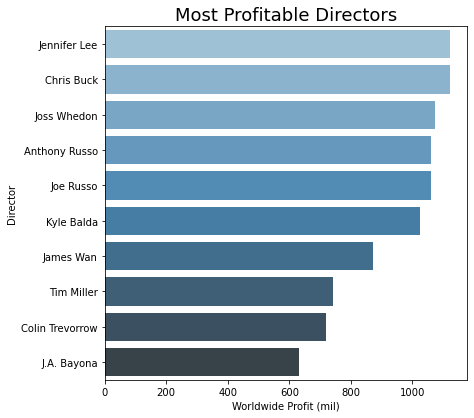

In [44]:
tmp = grouped_best_directors.sort_values('worldwide_profit_mil', ascending=False)['worldwide_profit_mil'].head(10)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Most Profitable Directors')
ax.set_xlabel('Worldwide Profit (mil)')
ax.set_ylabel('Director');

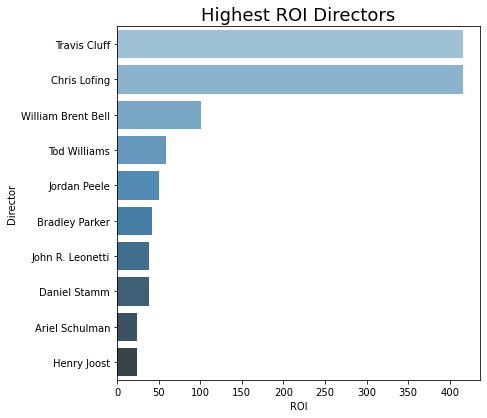

In [45]:
tmp = grouped_best_directors.sort_values('ROI', ascending=False)['ROI'].head(10)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Highest ROI Directors')
ax.set_xlabel('ROI')
ax.set_ylabel('Director');

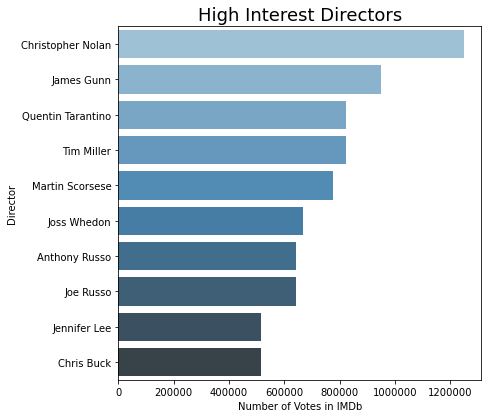

In [46]:
tmp = grouped_best_directors.sort_values('numvotes_y', ascending=False)['numvotes_y'].head(10)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('High Interest Directors')
ax.set_xlabel('Number of Votes in IMDb')
ax.set_ylabel('Director')
ax.ticklabel_format(style='plain', axis='x',useOffset=False);

## Conclusions

In conclusion, the way this relates back to the business problem is explored in our three recommendations.

### First Recommendation

The financial analysis illustrated that movies with higher production budgets are making more revenue at the box office. These findings are what led us to form our first recommendation: have a production budget of over a 150 million USD. 

### Second Recommendation


The analysis into genre provided the basis for our second recommendation: Microsoft studios should produce movies in a diverse range of genres, as well as make multiple movies simultaneously. This strategy will also effectively diversify the risk to Microsoft of this new endeavour. 


### Third Recommendation

The meta-analysis into which directors produce the best business outcomes concluded in forming our third recomendation: choose directors that drive popularity and profit within the recommended genres to direct those films. Furthermore, develop relationships with high profile directors in the way only a company like Microsoft can. 


## Next Steps

In this analysis, our raw data was primarly procured through third party websites. While this is typical for an initial industry evaluation; this resulted in a restricted raw data set. To provide a more well rounded and accurate analysis we would need to procure the following data:
1. Data pertaining to the marketing budget (as this is arguably more prevalent to profit than the production budget)
2. Data pertaining to merchandising and licensing (to more accurately capture "popularity" as a variable)
3. Data pertaining to the performance of Microsoft Studios in-studio movies (this is yet to be made)